# Predicting Restaurant Annual Turnover in India

The first thing any visitor to India will take in — probably while staring out the window in awe as their aeroplane descends — is the sheer size of this country. It is densely populated and patch-worked with distinct neighbourhoods, each with its own culinary identity. It would take several lifetimes to get to know all of the street stands, holes in the wall, neighbourhood favourites, and high-end destinations in this city.

## The Joy of Dining Out in India

For Indians, dining out is and always will be a joyous occasion. Everyone has their own favourite restaurants in the city, starting from the street food stall across the street to the 5-star restaurants in the heart of the city. Some are favourites because of the memories attached to them, and some are favourites because of the fantastic ambience. There are many other factors that contribute to the popularity of these restaurants.

## The Business Perspective

From a business perspective, the popularity of a restaurant is crucial. Higher popularity often means more visits to the restaurant, which leads to increased annual turnover. For a restaurant to thrive and continue operating, it must maintain a substantial annual turnover.

## The Problem: Predicting Annual Turnover

This problem aims to predict the annual turnover of a set of restaurants across India based on various factors. The dataset includes several key variables such as:

- **Restaurant-specific data**: Location, opening date, cuisine type, themes, etc.
- **External data**: Social media popularity index, Zomato ratings, and other external metrics.
- **Customer insights**: Survey data from customers and ratings from mystery visitors (third-party audits).

By analyzing these variables, we can gain insights into the factors that influence a restaurant's success and predict its annual turnover.


In [60]:
!pip install lightgbm

In [61]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
#
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from lightgbm import LGBMRegressor
# Set pandas display option to avoid scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_colwidth', None)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/MyDrive/Python Course'

In [89]:
# Read File
rest_df=pd.read_csv(f"{path}/Res_Train_dataset.csv")

In [5]:
rest_df.head()

Registration Number  Annual Turnover           Cuisine       City  \
0                60001         42000000      indian,irish  Bangalore   
1                60002         50000000      indian,irish     Indore   
2                60003         32500000   tibetan,italian    Chennai   
3                60004        110000000  turkish,nigerian    Gurgaon   
4                60005         20000000     irish,belgian    Manesar   

  Restaurant Location Opening Day of Restaurant  Facebook Popularity Quotient  \
0   Near Business Hub                  14/02/09                          84.3   
1      Near Party Hub                  29/09/08                          85.4   
2   Near Business Hub                  30/07/11                          85.0   
3      Near Party Hub                  30/11/08                          85.6   
4      Near Party Hub                  22/02/10                           NaN   

        Endorsed By  Instagram Popularity Quotient  Fire Audit  ...  \
0      Not Specific                           95.8           1  ...   
1  Tier A Celebrity                           85.0           1  ...   
2  Tier A Celebrity                           68.2           1  ...   
3  Tier A Celebrity                           83.6           0  ...   
4  Tier A Celebrity                           76.8           1  ...   

   Overall Restaurant Rating  Live Music Rating  Comedy Gigs Rating  \
0                       10.0                4.0                 NaN   
1                        9.0                NaN                 4.0   
2                        8.0                3.0                 NaN   
3                        9.0                6.0                 NaN   
4                        6.0                NaN                 2.0   

   Value Deals Rating  Live Sports Rating Ambience Lively  Service  \
0                 NaN                 NaN      8.0      8        6   
1                 NaN                 NaN      5.0      7        7   
2                 NaN                 NaN      7.0     10        5   
3                 NaN                 NaN      7.0      7        4   
4                 NaN                 NaN      NaN      6        2   

   Comfortablility  Privacy  
0                6        6  
1                3        8  
2                2        8  
3                3        5  
4                4        6  

[5 rows x 34 columns]

In [11]:
rest_df.shape

(3493, 34)

In [10]:
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3493 non-null   int64  
 1   Annual Turnover                3493 non-null   int64  
 2   Cuisine                        3493 non-null   object 
 3   City                           3493 non-null   object 
 4   Restaurant Location            3493 non-null   object 
 5   Opening Day of Restaurant      3493 non-null   object 
 6   Facebook Popularity Quotient   3394 non-null   float64
 7   Endorsed By                    3493 non-null   object 
 8   Instagram Popularity Quotient  3437 non-null   float64
 9   Fire Audit                     3493 non-null   int64  
 10  Liquor License Obtained        3493 non-null   int64  
 11  Situated in a Multi Complex    3493 non-null   int64  
 12  Dedicated Parking              3493 non-null   i

In [7]:
rest_df.isnull().sum()

Registration Number                 0
Annual Turnover                     0
Cuisine                             0
City                                0
Restaurant Location                 0
Opening Day of Restaurant           0
Facebook Popularity Quotient       99
Endorsed By                         0
Instagram Popularity Quotient      56
Fire Audit                          0
Liquor License Obtained             0
Situated in a Multi Complex         0
Dedicated Parking                   0
Open Sitting Available              0
Resturant Tier                     49
Restaurant Type                     0
Restaurant Theme                    0
Restaurant Zomato Rating            0
Restaurant City Tier                0
Order Wait Time                     0
Staff Responsivness                 0
Value for Money                     0
Hygiene Rating                      0
Food Rating                         0
Overall Restaurant Rating         212
Live Music Rating                 765
Comedy Gigs Rating               2483
Value Deals Rating               2707
Live Sports Rating               3288
Ambience                           25
Lively                              0
Service                             0
Comfortablility                     0
Privacy                             0
dtype: int64

In [8]:
rest_df.isna().sum()

Registration Number                 0
Annual Turnover                     0
Cuisine                             0
City                                0
Restaurant Location                 0
Opening Day of Restaurant           0
Facebook Popularity Quotient       99
Endorsed By                         0
Instagram Popularity Quotient      56
Fire Audit                          0
Liquor License Obtained             0
Situated in a Multi Complex         0
Dedicated Parking                   0
Open Sitting Available              0
Resturant Tier                     49
Restaurant Type                     0
Restaurant Theme                    0
Restaurant Zomato Rating            0
Restaurant City Tier                0
Order Wait Time                     0
Staff Responsivness                 0
Value for Money                     0
Hygiene Rating                      0
Food Rating                         0
Overall Restaurant Rating         212
Live Music Rating                 765
Comedy Gigs Rating               2483
Value Deals Rating               2707
Live Sports Rating               3288
Ambience                           25
Lively                              0
Service                             0
Comfortablility                     0
Privacy                             0
dtype: int64

There are both nan and null values

In [14]:
# Step 1: Calculate the percentage of null values for each column
null_percentage = rest_df.isnull().mean() * 100

# Step 2: Find columns with more than 50% null values
columns_with_high_nulls = null_percentage[null_percentage > 50].index.tolist()
columns_with_high_nulls

['Comedy Gigs Rating', 'Value Deals Rating', 'Live Sports Rating']

In [15]:
# dropping 50% null values column
rest_df.drop(columns_with_high_nulls,axis=1,inplace=True)

In [29]:
#Treat other missing values
null_percentage_numeric = rest_df.select_dtypes(include=np.number).isnull().mean() * 100

columns_with_numeric_nulls = null_percentage_numeric[null_percentage_numeric > 0].index.tolist()

for col in columns_with_numeric_nulls:
    rest_df[col].fillna(rest_df[col].median(), inplace=True)

In [30]:
# check if any missing values
rest_df.isnull().sum()

Registration Number              0
Annual Turnover                  0
Cuisine                          0
City                             0
Restaurant Location              0
Opening Day of Restaurant        0
Facebook Popularity Quotient     0
Endorsed By                      0
Instagram Popularity Quotient    0
Fire Audit                       0
Liquor License Obtained          0
Situated in a Multi Complex      0
Dedicated Parking                0
Open Sitting Available           0
Resturant Tier                   0
Restaurant Type                  0
Restaurant Theme                 0
Restaurant Zomato Rating         0
Restaurant City Tier             0
Order Wait Time                  0
Staff Responsivness              0
Value for Money                  0
Hygiene Rating                   0
Food Rating                      0
Overall Restaurant Rating        0
Live Music Rating                0
Comedy Gigs Rating               0
Value Deals Rating               0
Live Sports Rating               0
Ambience                         0
Lively                           0
Service                          0
Comfortablility                  0
Privacy                          0
dtype: int64

In [59]:
rest_df.describe(include='number').T

count        mean         std        min  \
Registration Number           3493.00    61747.00     1008.49   60001.00   
Annual Turnover               3493.00 30725708.56 21651246.90 3500000.00   
Facebook Popularity Quotient  3493.00       77.97        9.69      43.00   
Instagram Popularity Quotient 3493.00       74.40       10.85      40.00   
Fire Audit                    3493.00        0.79        0.41       0.00   
Liquor License Obtained       3493.00        0.99        0.11       0.00   
Situated in a Multi Complex   3493.00        0.81        0.39       0.00   
Dedicated Parking             3493.00        0.80        0.40       0.00   
Open Sitting Available        3493.00        0.80        0.40       0.00   
Resturant Tier                3493.00        1.93        0.26       1.00   
Restaurant Zomato Rating      3493.00        2.70        0.79       0.00   
Restaurant City Tier          3493.00        0.30        0.46       0.00   
Order Wait Time               3493.00        5.51        2.85       1.00   
Staff Responsivness           3493.00        4.54        1.09       1.00   
Value for Money               3493.00        4.53        0.91       1.00   
Hygiene Rating                3493.00        4.66        1.26       1.00   
Food Rating                   3493.00        7.52        1.72       5.00   
Overall Restaurant Rating     3493.00        8.51        1.25       6.00   
Live Music Rating             3493.00        4.01        0.89       1.00   
Comedy Gigs Rating            3493.00        2.98        0.46       1.00   
Value Deals Rating            3493.00        3.92        0.48       1.00   
Live Sports Rating            3493.00        3.98        0.24       2.00   
Ambience                      3493.00        6.43        2.04       0.00   
Lively                        3493.00        6.87        1.85       0.00   
Service                       3493.00        4.55        1.88       0.00   
Comfortablility               3493.00        3.23        1.99       0.00   
Privacy                       3493.00        6.28        1.90       0.00   

                                      25%         50%         75%          max  
Registration Number              60874.00    61747.00    62620.00     63493.00  
Annual Turnover               18000000.00 30000000.00 37000000.00 400000000.00  
Facebook Popularity Quotient        72.00       79.00       85.60        97.76  
Instagram Popularity Quotient       66.40       74.05       82.20        98.70  
Fire Audit                           1.00        1.00        1.00         1.00  
Liquor License Obtained              1.00        1.00        1.00         1.00  
Situated in a Multi Complex          1.00        1.00        1.00         1.00  
Dedicated Parking                    1.00        1.00        1.00         1.00  
Open Sitting Available               1.00        1.00        1.00         1.00  
Resturant Tier                       2.00        2.00        2.00         2.00  
Restaurant Zomato Rating             2.00        3.00        3.00         5.00  
Restaurant City Tier                 0.00        0.00        1.00         1.00  
Order Wait Time                      3.00        5.00        8.00        10.00  
Staff Responsivness                  4.00        5.00        5.00         8.00  
Value for Money                      4.00        5.00        5.00         7.00  
Hygiene Rating                       4.00        5.00        6.00         9.00  
Food Rating                          6.00        7.00        9.00        10.00  
Overall Restaurant Rating            8.00        9.00        9.00        10.00  
Live Music Rating                    4.00        4.00        4.00         8.00  
Comedy Gigs Rating                   3.00        3.00        3.00         6.00  
Value Deals Rating                   4.00        4.00        4.00         7.00  
Live Sports Rating                   4.00        4.00        4.00         6.00  
Ambience                             5.0

In [40]:
rest_temp=rest_df.groupby(['Cuisine'])[['Annual Turnover']].mean().sort_values('Annual Turnover')
rest_temp

Annual Turnover
Cuisine                             
irish,belgian            22847058.82
chinese,salvadorian      25006289.31
welsh,thai               26007246.38
cuban,british            26111111.11
turkish,sapnish          26649659.86
nigerian,cajun           27000000.00
swedish,greek            27141304.35
peruvian,cuban           27847826.09
algerian,korean          29078313.25
algerian,belgian         29193548.39
algerian,algerian        30477611.94
british,belgian          30550000.00
british,japanese         31127306.27
tibetan,italian          31338129.50
indian,irish             32159340.66
polish,jewish            32768376.07
tibetan,greek            34125364.43
japanese,thai            34394607.84
turkish,nigerian         34842222.22
hawaiian,latvian         39673913.04

In [116]:
rest_temp_theme=rest_df.groupby(['Restaurant Theme'])[['Annual Turnover']].mean().sort_values('Annual Turnover',ascending=False)
rest_temp_theme

Annual Turnover
Restaurant Theme                 
LaCuisine             70000000.00
Piquant               46000000.00
English               40421052.63
Savory                38750000.00
Downtown              38450000.00
Cafepro               37000000.00
Molino                36500000.00
Sage                  36000000.00
Carbone               35750000.00
Bettaso               33750000.00
Bakery                33500000.00
Petit                 32625000.00
Flavors               32000000.00
Arabian               31621267.30
Nature                31613966.48
Mise En               31428571.43
90's                  30791095.89
Italica               30500000.00
Benedicta             30500000.00
Greek                 29535436.89
Chinese               28918918.92
Delicio               28565217.39
Parsi                 28495145.63
Moonrise              27750000.00
Belise                26500000.00
TheGem                24583333.33
Marco                 24500000.00
Picante               24000000.00
Resca                 21000000.00
Cinnamon              20000000.00
Umami                 14833333.33
Ambiance              14500000.00
Grand                 10000000.00
Spoon                 10000000.00

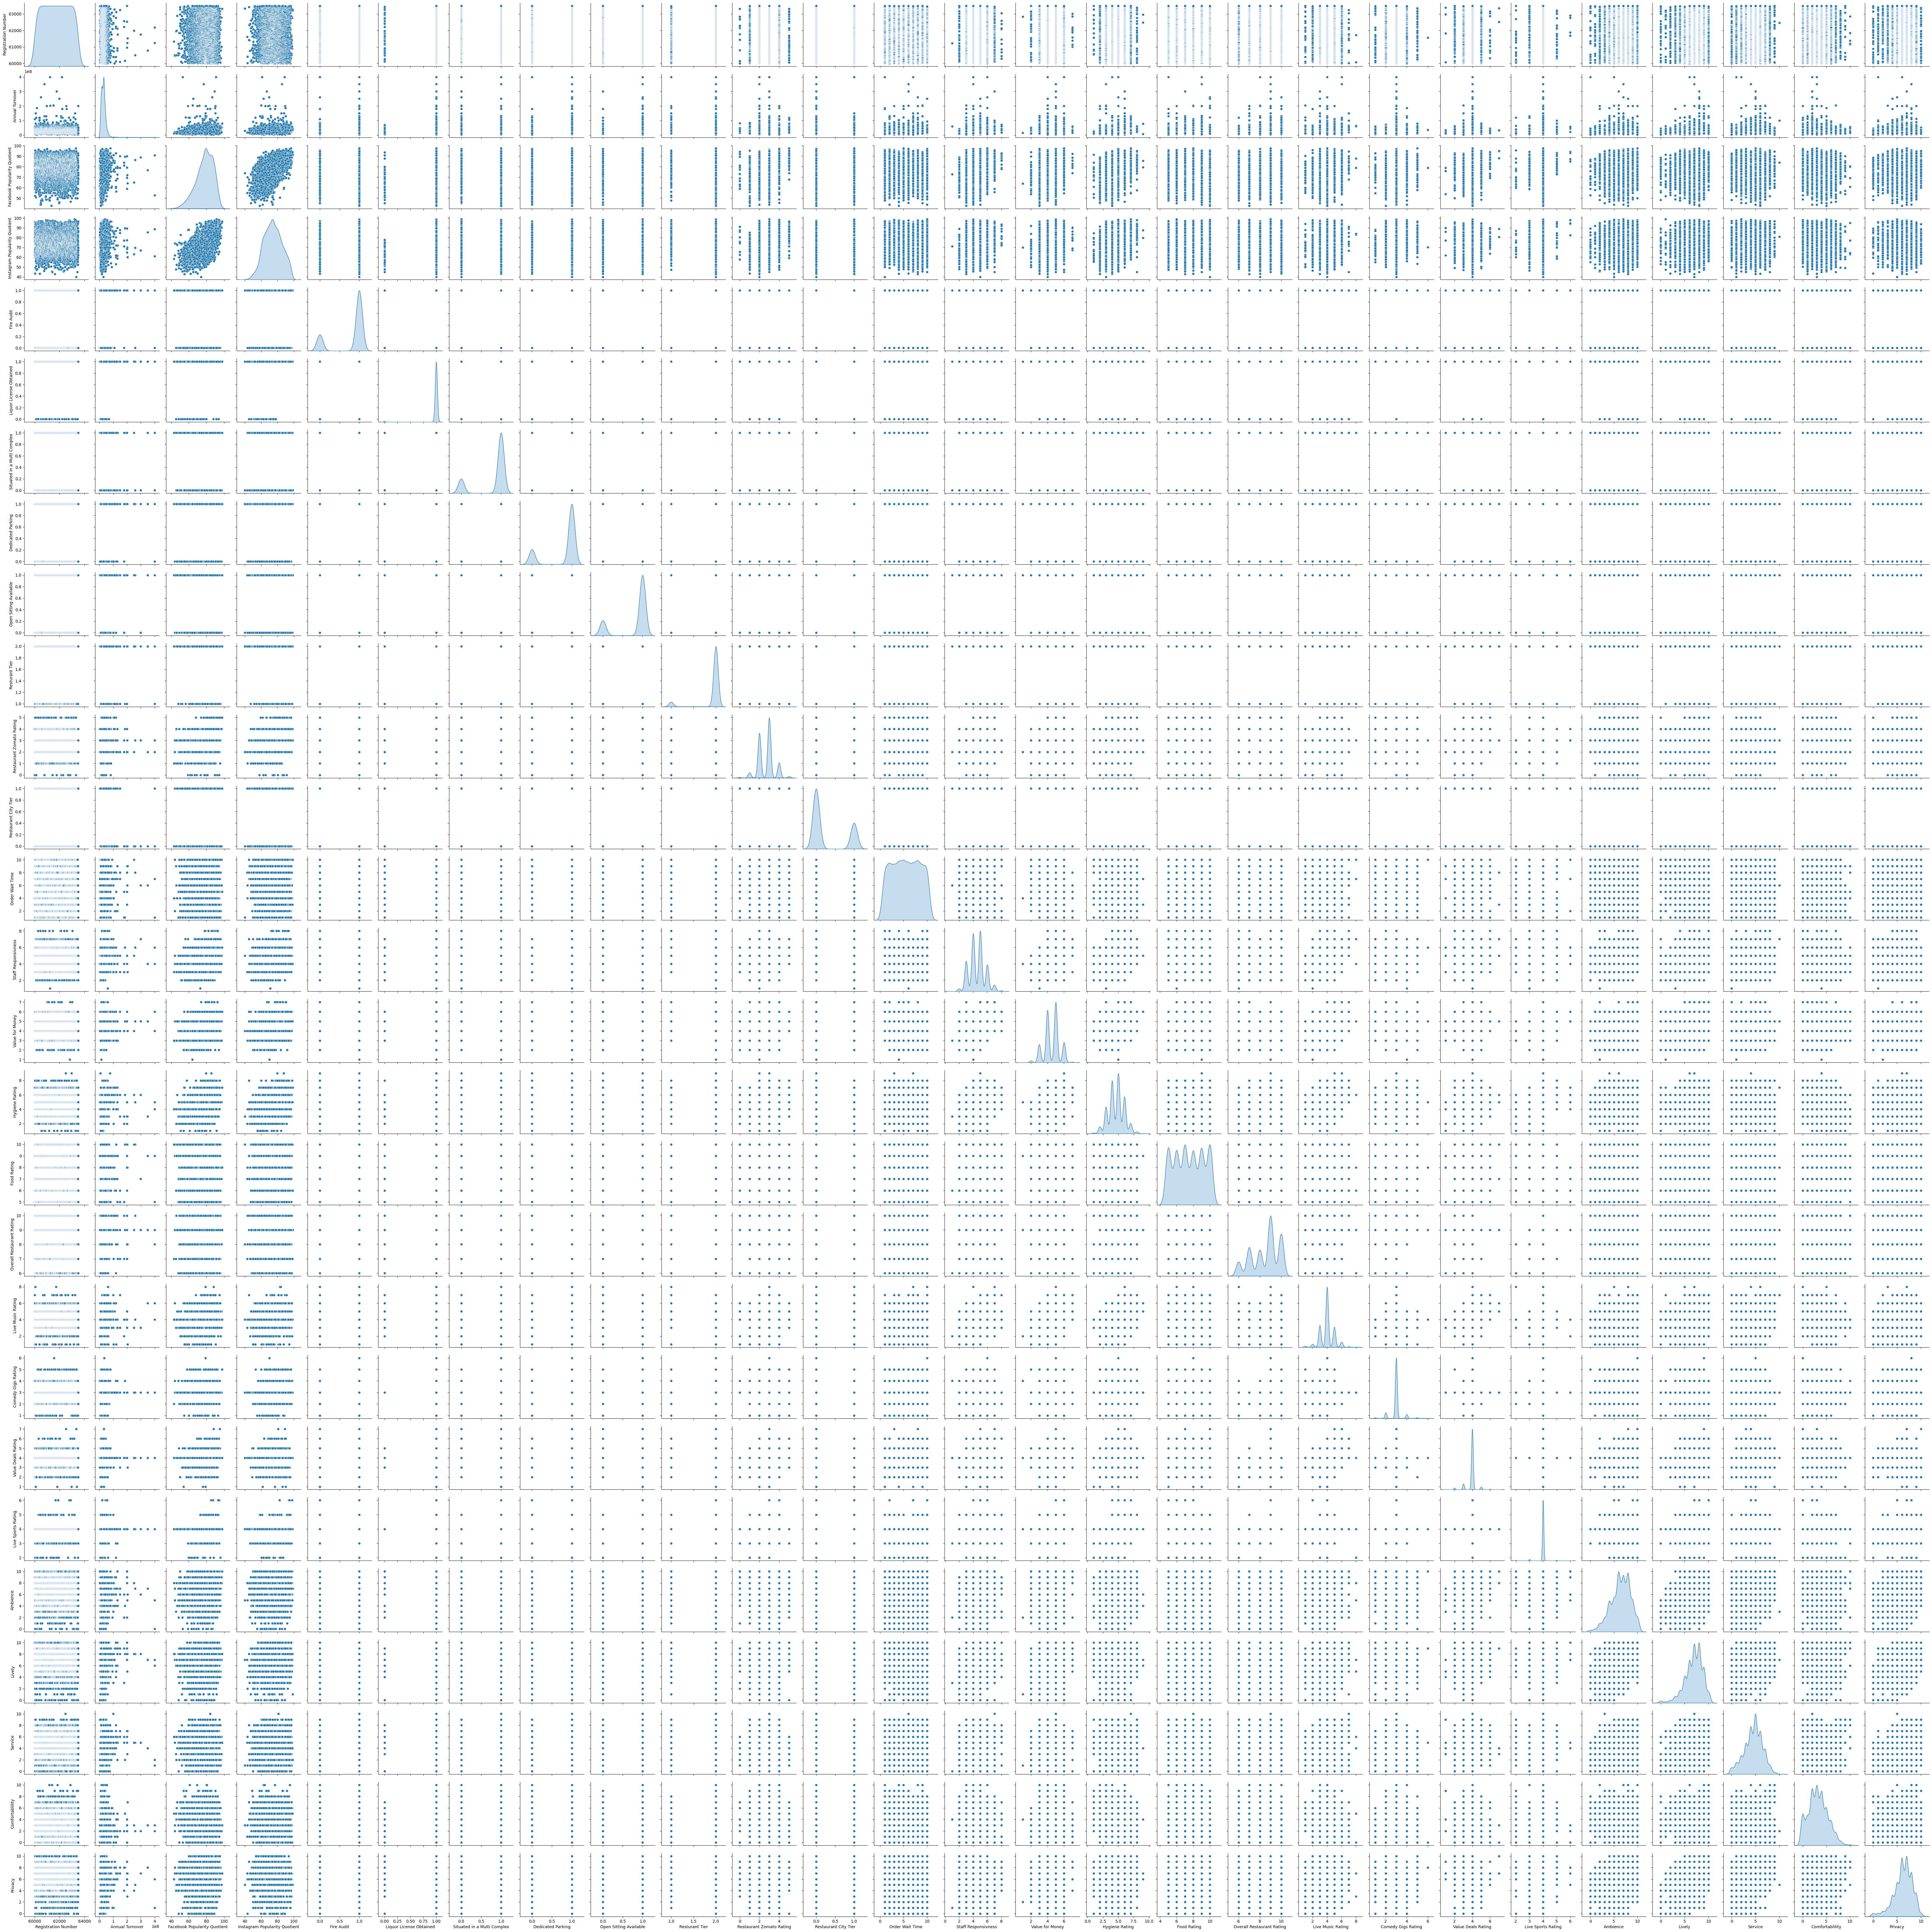

In [44]:
sns.pairplot(rest_df, diag_kind="kde", kind="scatter", palette="Set2");

Not much strong relation and colinerairity observed
- Only Facebook Popularity quotient and Instagram Popularity Quotient are co-linear we can remove one of them as botn are having same kind of realtion with traget variable

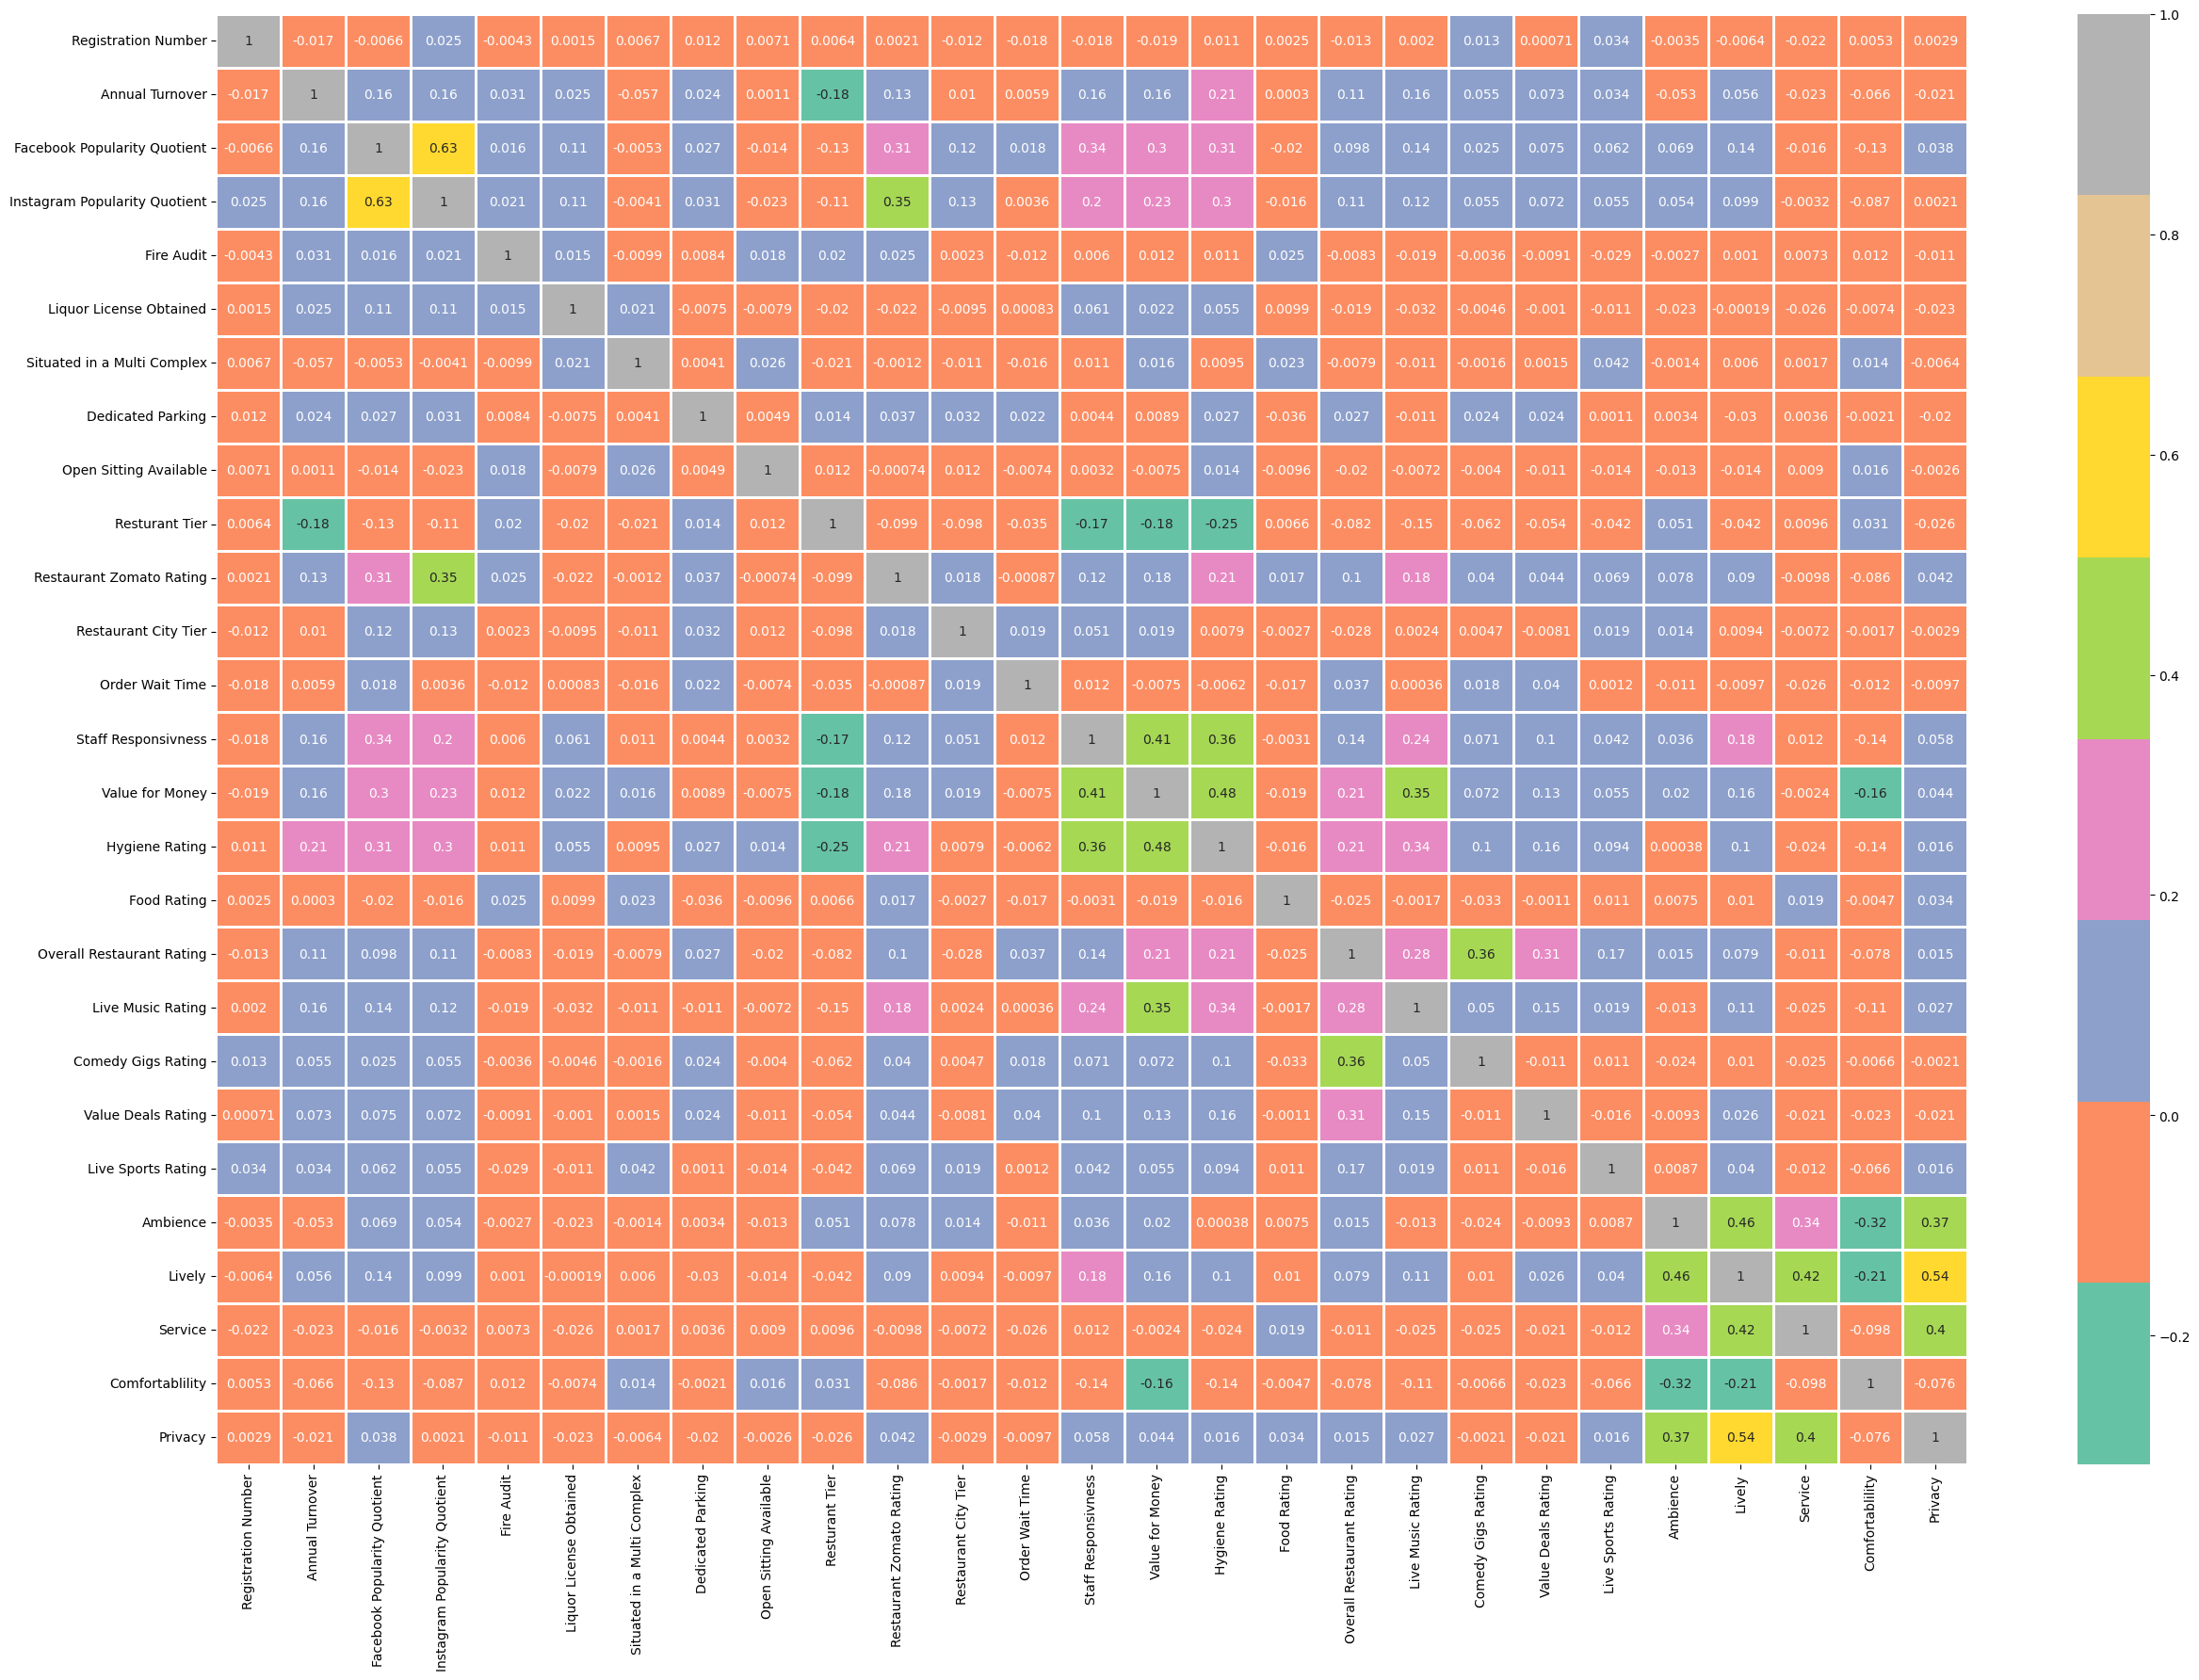

In [53]:
plt.figure(figsize=(30,20))
sns.heatmap(rest_df.select_dtypes(include=np.number).corr(),annot=True,cmap='Set2',linewidths=1);

### Key Observations:
1. **Strong Positive Correlations**:
   - Features like **Annual Turnover**, **Facebook Popularity Quotient**, and **Instagram Popularity Quotient** are strongly correlated, suggesting that social media engagement is a significant driver of revenue.
   - **Value for Money** and **Hygiene Rating** have a strong positive correlation, indicating that customers often associate value with cleanliness.

2. **Weak or No Correlations**:
   - Some features, like **Registration Number**, show weak or no correlation with other variables, as they may not influence the dependent variables significantly.

3. **Negative Correlations**:
   - There is some negative correlation between **Hygiene Rating** and **Restaurant Tier**, suggesting that high-tier restaurants may need to focus more on hygiene perceptions.

### Insights:
- Social media presence plays a critical role in increasing turnover.
- Staff responsiveness,value for money,hygine ratings,Zoato ratings and live music rating has impact on turn over as well
- Customer satisfaction (e.g., hygiene, value for money) is interconnected and impacts overall restaurant ratings.
- Identifying and leveraging highly correlated features can improve predictive modeling.


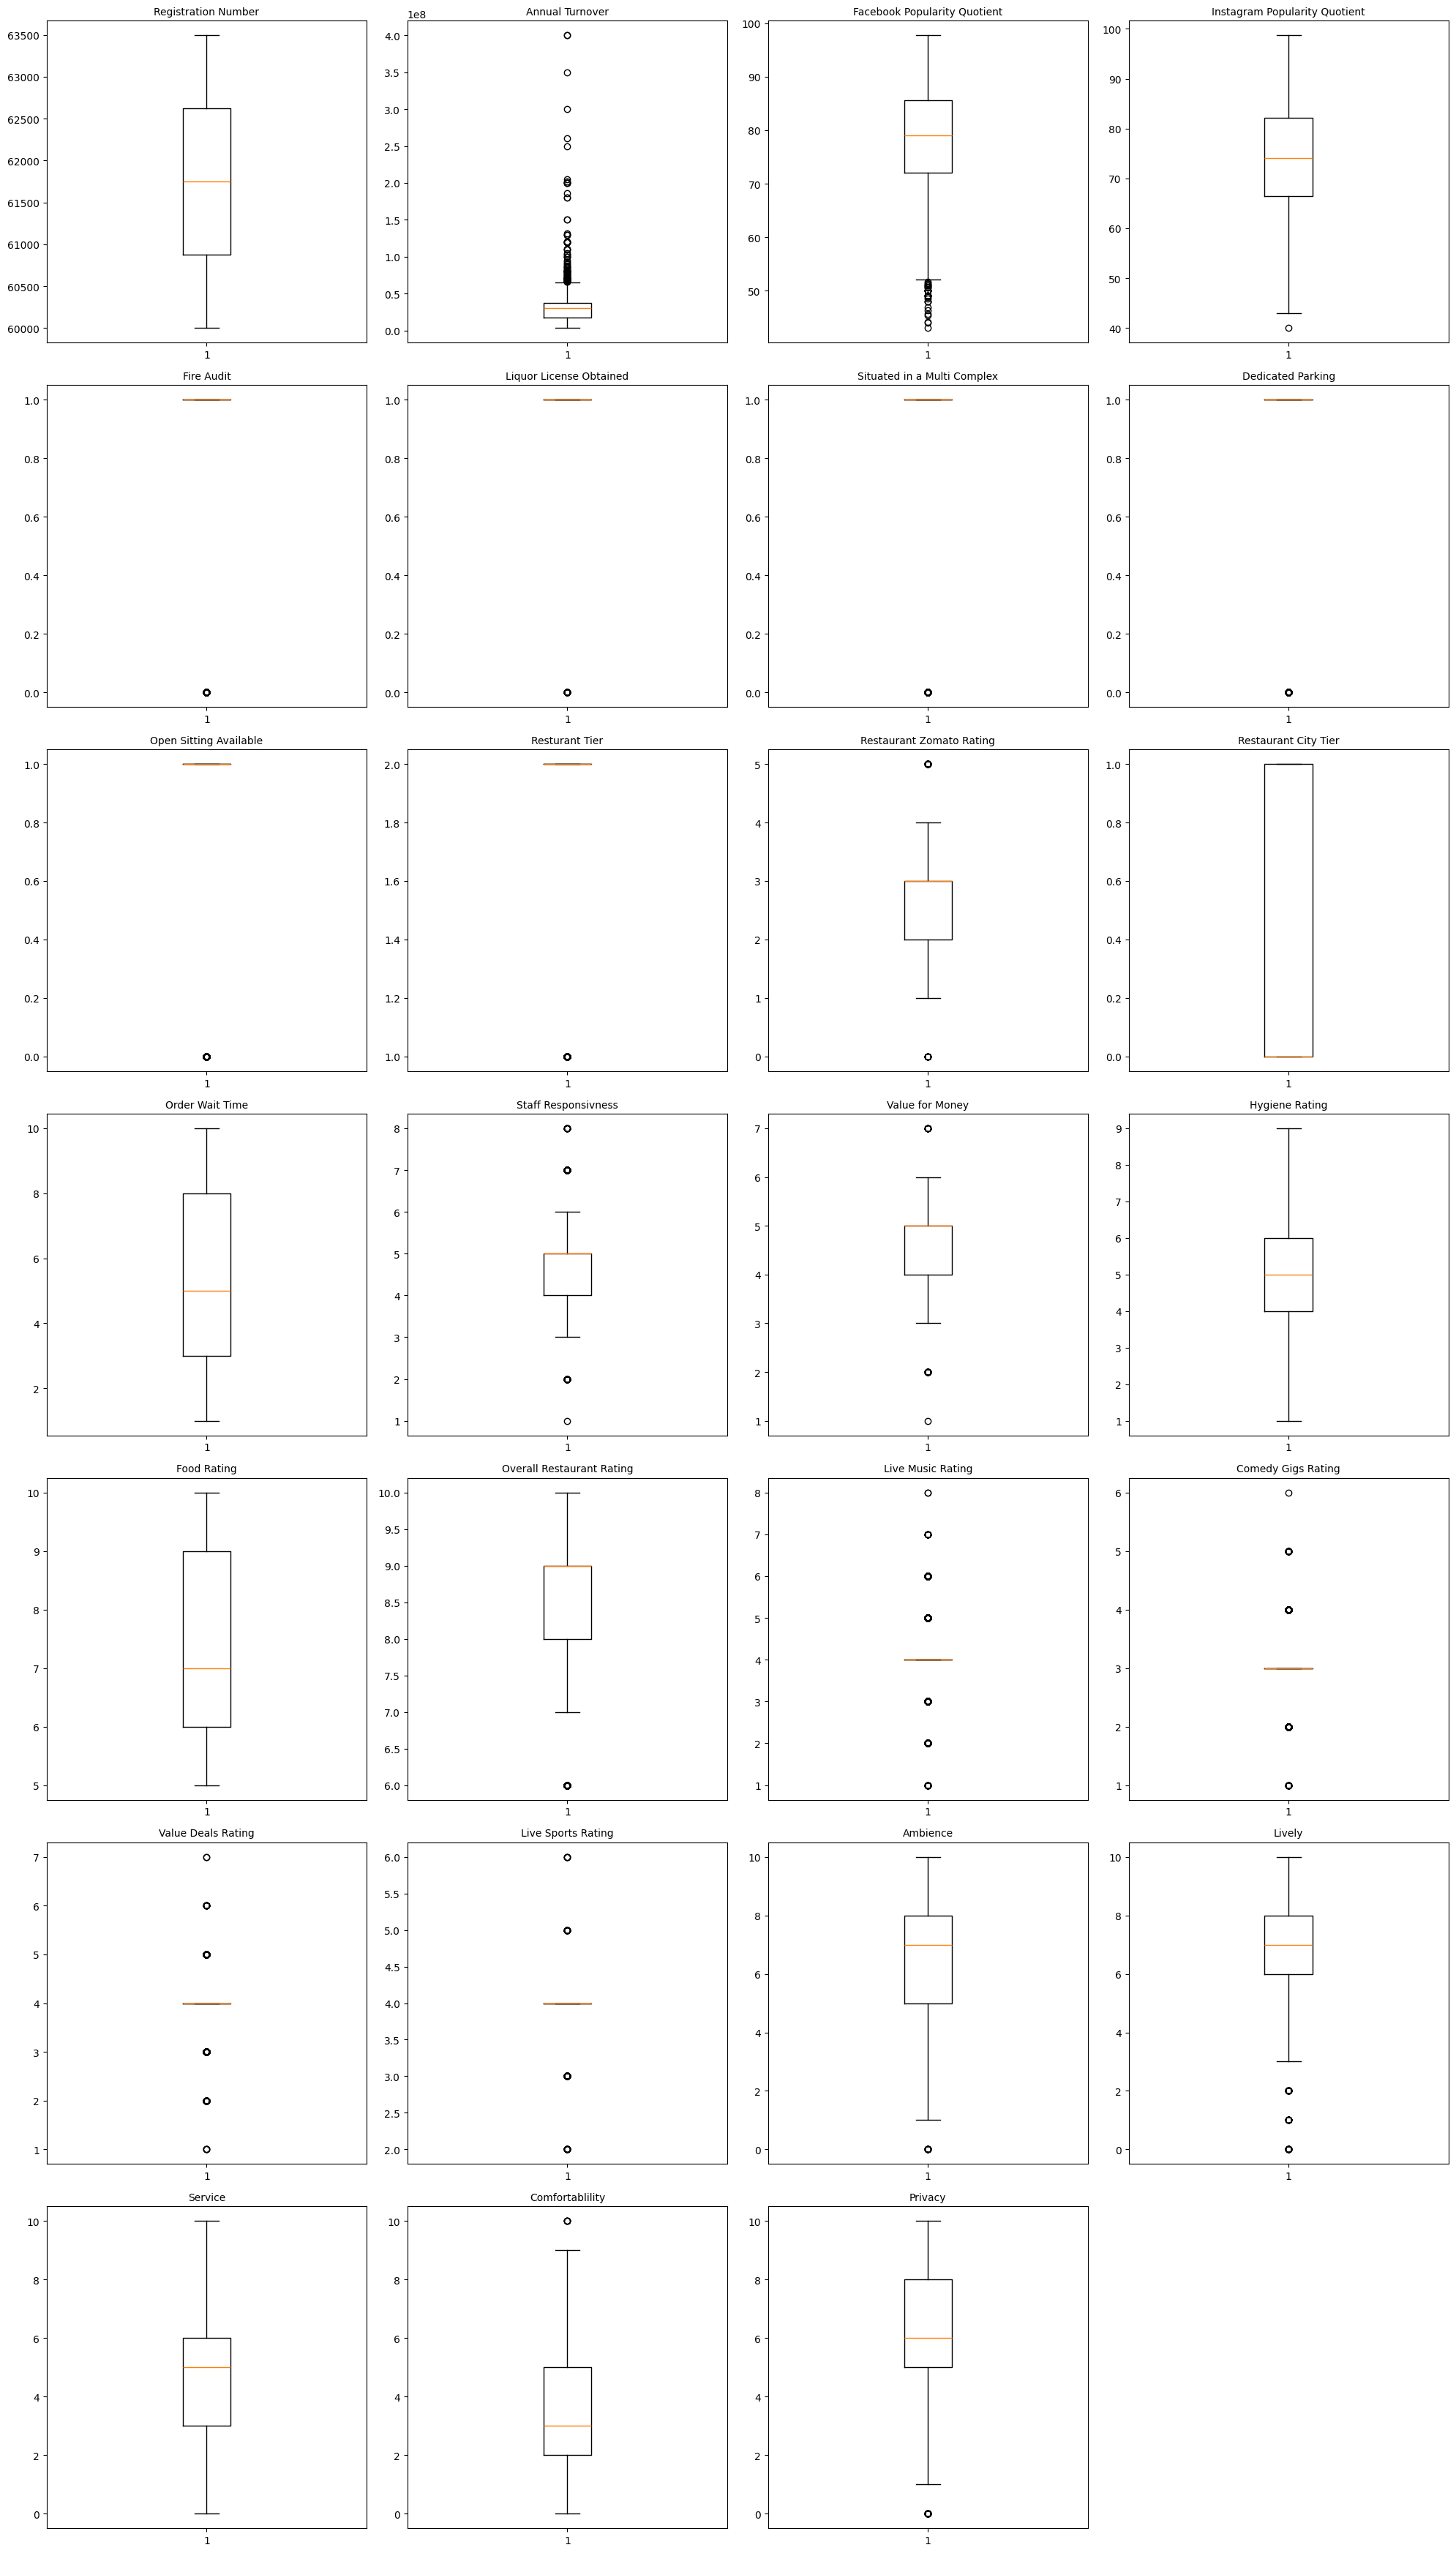

In [58]:
# Select numerical columns
numerical_col = rest_df.select_dtypes(include=np.number).columns.tolist()
num_columns = len(numerical_col)

# Calculate grid size
rows = (num_columns // 4) + (num_columns % 4 > 0)  # 4 subplots per row
cols = 4  # Fixed number of columns

# Set the figure size
plt.figure(figsize=(5 * cols, 5 * rows))  # Adjust figure size dynamically

# Plot boxplots for each numerical column
for i, variable in enumerate(numerical_col):
    plt.subplot(rows, cols, i + 1)  # Ensure subplot numbering starts from 1
    plt.boxplot(rest_df[variable].dropna(), whis=1.5)  # Handle NaN values
    plt.title(variable, fontsize=10)

# Prevent overlapping of plots
plt.tight_layout()

# Display the plots
plt.show()

There are some outliers and even anualturnover max value is quite high as well.We will not treat them as those seems to be actual value and annula turnover is dependent variables

### Processing Of data

In [98]:
# Capture only year
rest_df['Opening Day of Restaurant'] = pd.to_datetime(rest_df['Opening Day of Restaurant'], format='%d/%m/%y')
rest_df['Opening Year'] = rest_df['Opening Day of Restaurant'].dt.year
rest_df.drop(columns=['Opening Day of Restaurant'], inplace=True)  # Remove  column  not needed


In [96]:
# High cardnilaity values so better to drop
rest_df['City'].nunique()
rest_df.drop(columns=['City'],inplace=True)

In [99]:
rest_df

Registration Number  Annual Turnover           Cuisine  \
0                   60001         42000000      indian,irish   
1                   60002         50000000      indian,irish   
2                   60003         32500000   tibetan,italian   
3                   60004        110000000  turkish,nigerian   
4                   60005         20000000     irish,belgian   
...                   ...              ...               ...   
3488                63489         40500000  algerian,belgian   
3489                63490         32500000     tibetan,greek   
3490                63491         42500000      indian,irish   
3491                63492         53000000     japanese,thai   
3492                63493         12000000      indian,irish   

     Restaurant Location  Facebook Popularity Quotient       Endorsed By  \
0      Near Business Hub                         84.30      Not Specific   
1         Near Party Hub                         85.40  Tier A Celebrity   
2      Near Business Hub                         85.00  Tier A Celebrity   
3         Near Party Hub                         85.60  Tier A Celebrity   
4         Near Party Hub                           NaN  Tier A Celebrity   
...                  ...                           ...               ...   
3488      Near Party Hub                         69.10      Not Specific   
3489      Near Party Hub                         91.00      Not Specific   
3490      Near Party Hub                         80.83      Not Specific   
3491      Near Party Hub                         79.40      Not Specific   
3492      Near Party Hub                         72.00      Not Specific   

      Instagram Popularity Quotient  Fire Audit  Liquor License Obtained  \
0                             95.80           1                        1   
1                             85.00           1                        1   
2                             68.20           1                        1   
3                             83.60           0                        1   
4                             76.80           1                        1   
...                             ...         ...                      ...   
3488                          62.11           1                        1   
3489                          96.30           1                        1   
3490                          86.80           1                        1   
3491                          86.00           1                        1   
3492                          67.00           1                        1   

      Situated in a Multi Complex  ...  Live Music Rating  Comedy Gigs Rating  \
0                               1  ...               4.00                 NaN   
1                               1  ...                NaN                4.00   
2                               1  ...               3.00                 NaN   
3                               1  ...               6.00                 NaN   
4                               1  ...                NaN                2.00   
...                           ...  ...                ...                 ...   
3488                            0  ...               5.00                 NaN   
3489                            0  ...               4.00                 NaN   
3490                            1  ...                NaN                 NaN   
3491                            1  ...               3.00                2.00   
3492                            1  ...               1.00                 NaN   

      Value Deals Rating Live Sports Rating Ambience  Lively  Service  \
0                    NaN                NaN     8.00       8        6   
1                    NaN                NaN     5.00       7        7   
2                    NaN                NaN     7.00      10        5   
3                    NaN                NaN     7.00       7        4   
4                    NaN                NaN      NaN       6        2   


In [101]:
Categorical_columns=["Restaurant Location","Endorsed By","Restaurant Type","Cuisine"]
rest_df_encoded = pd.get_dummies(rest_df, columns=Categorical_columns,drop_first=True)

In [106]:
rest_copy = rest_df_encoded.copy(deep=True)
rest_copy

Registration Number  Annual Turnover  Facebook Popularity Quotient  \
0                   60001         42000000                         84.30   
1                   60002         50000000                         85.40   
2                   60003         32500000                         85.00   
3                   60004        110000000                         85.60   
4                   60005         20000000                           NaN   
...                   ...              ...                           ...   
3488                63489         40500000                         69.10   
3489                63490         32500000                         91.00   
3490                63491         42500000                         80.83   
3491                63492         53000000                         79.40   
3492                63493         12000000                         72.00   

      Instagram Popularity Quotient  Fire Audit  Liquor License Obtained  \
0                             95.80           1                        1   
1                             85.00           1                        1   
2                             68.20           1                        1   
3                             83.60           0                        1   
4                             76.80           1                        1   
...                             ...         ...                      ...   
3488                          62.11           1                        1   
3489                          96.30           1                        1   
3490                          86.80           1                        1   
3491                          86.00           1                        1   
3492                          67.00           1                        1   

      Situated in a Multi Complex  Dedicated Parking  Open Sitting Available  \
0                               1                  0                       1   
1                               1                  1                       0   
2                               1                  1                       0   
3                               1                  1                       1   
4                               1                  1                       1   
...                           ...                ...                     ...   
3488                            0                  1                       1   
3489                            0                  1                       0   
3490                            1                  1                       0   
3491                            1                  1                       1   
3492                            1                  1                       1   

      Resturant Tier  ... Cuisine_japanese,thai  Cuisine_nigerian,cajun  \
0               2.00  ...                 False                   False   
1               2.00  ...                 False                   False   
2               2.00  ...                 False                   False   
3               1.00  ...                 False                   False   
4                NaN  ...                 False                   False   
...              ...  ...                   ...                     ...   
3488            2.00  ...                 False                   False   
3489            2.00  ...                 False                   False   
3490            2.00  ...                 False                   False   
3491            2.00  ...                  True                   False   
3492            2.00  ...                 False                   False   

      Cuisine_peruvian,cuban  Cuisine_polish,jewish  Cuisine_swedish,greek  \
0                      False                  False                  False   
1                      False                  False                  False   
2                      False                  False                  False   
3     

In [73]:
rest_copy['Opening Year'].unique()

array([2009, 2008, 2011, 2010, 2012, 2006, 2007, 2005, 2013, 1996, 2004,
       2014, 2016, 2002, 2003, 2000, 2001], dtype=int32)

### Modelling
### Regression models:

- Random Forest
- SVR
- LgBoost

In [107]:
# Create x and y variables
X = rest_copy.drop(columns=['Annual Turnover'])
y = rest_copy['Annual Turnover']

In [111]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print(f"shape of Train and test Train->{X_train.shape} Test->{X_test.shape} Y train->{y_train.shape} y test->{y_test.shape}")

shape of Train and test Train->(2445, 53) Test->(1048, 53) Y train->(2445,) y test->(1048,)


In [109]:
X_train.head(5)

Registration Number  Facebook Popularity Quotient  \
221                 60222                         87.00   
3274                63275                         82.00   
1329                61330                         80.20   
2681                62682                         93.00   
1156                61157                         60.50   

      Instagram Popularity Quotient  Fire Audit  Liquor License Obtained  \
221                           72.00           1                        1   
3274                          75.00           1                        1   
1329                          69.80           1                        1   
2681                          94.60           1                        1   
1156                          72.15           0                        0   

      Situated in a Multi Complex  Dedicated Parking  Open Sitting Available  \
221                             1                  1                       1   
3274                            1                  1                       1   
1329                            1                  1                       1   
2681                            1                  1                       1   
1156                            1                  1                       1   

      Resturant Tier Restaurant Theme  ...  Cuisine_japanese,thai  \
221             2.00            Greek  ...                  False   
3274            2.00           Belise  ...                  False   
1329            2.00            Greek  ...                  False   
2681            2.00            Greek  ...                  False   
1156            2.00          Arabian  ...                  False   

      Cuisine_nigerian,cajun  Cuisine_peruvian,cuban  Cuisine_polish,jewish  \
221                    False                   False                  False   
3274                   False                   False                  False   
1329                   False                   False                  False   
2681                   False                   False                  False   
1156                   False                   False                  False   

      Cuisine_swedish,greek  Cuisine_tibetan,greek  Cuisine_tibetan,italian  \
221                   False                   True                    False   
3274                  False                  False                    False   
1329                  False                  False                    False   
2681                  False                  False                    False   
1156                  False                  False                    False   

      Cuisine_turkish,nigerian  Cuisine_turkish,sapnish  Cuisine_welsh,thai  
221                      False                    False               False  
3274                     False                    False               False  
1329                     False                    False               False  
2681                     False                    False                True  
1156                     False                    False               False  

[5 rows x 53 columns]

In [112]:
# Create Random Forest Regressor model
model = RandomForestRegressor(n_estimators=500 ,random_state=0)
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Greek'